<a href="https://colab.research.google.com/github/nghhuan05/ivp-ktlsp_groupassignment/blob/main/2_1_4_B%C3%A0i_t%E1%BA%ADp_th%E1%BB%B1c_h%C3%A0nh_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import graphviz

df = pd.read_csv('diabetes_prediction_dataset.csv')
features_response = df.columns.tolist()
items_to_remove = ['smoking_history', 'diabetes']
features_response = [item for item in features_response if item not in items_to_remove]

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[features_response], columns=['gender'], drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(df_encoded.values,
                                                    df['diabetes'].values,
                                                    test_size=0.2, random_state=24)

In [23]:
# Tạo cây quyết định
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  error_score=np.nan,
                  return_train_score=True)
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-598801069.py:8: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores')
/tmp/ipython-input-598801069.py:12: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE testing scores')


AttributeError: 'Axes' object has no attribute 'errobar'

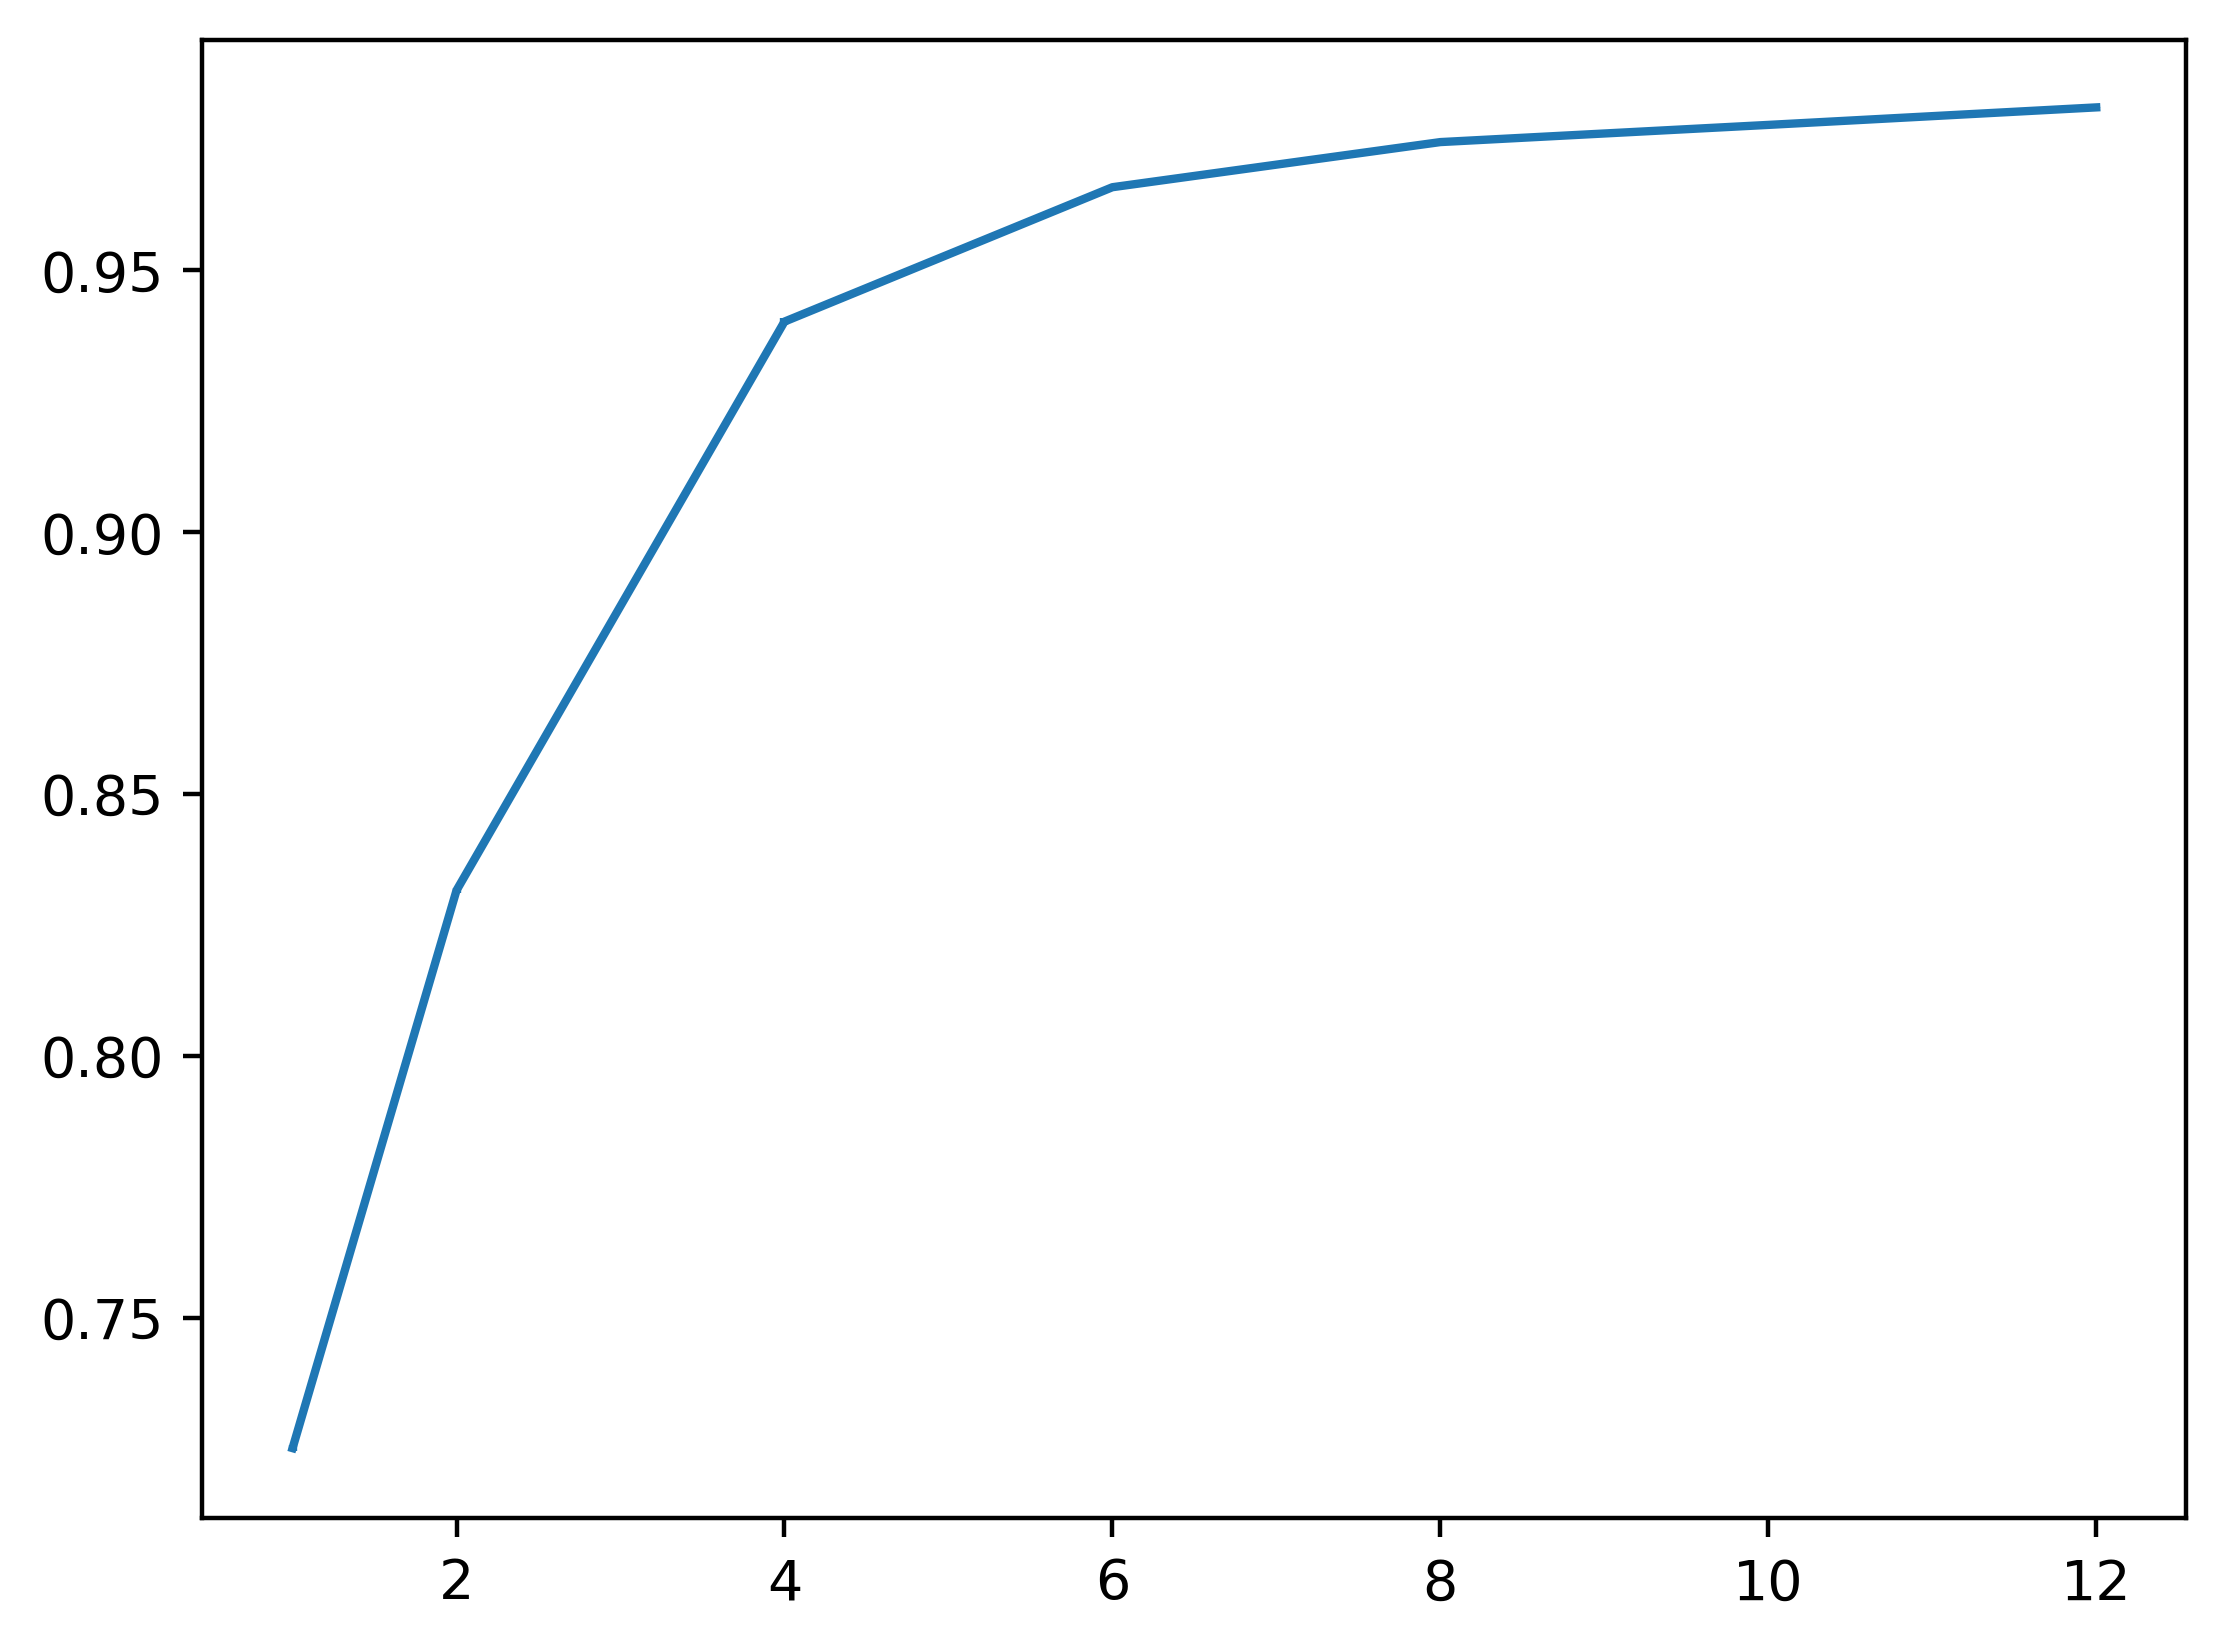

In [24]:
cv_results_df = pd.DataFrame(cv.cv_results_)
# View the names of the remaining columns in the results DataFrame
cv_results_df.columns
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errobar(cv_results_df['param_max_depth'],
           cv_results_df['mean_test_score'],
           yerr=cv_results_df['std_test_score']/np.sqrt(4),
           label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [5]:
# Tạo rừng cây
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
    bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False,
    class_weight=None)

In [18]:
#a parameter grid for this exercise in order to search the numbers of trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators': list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=None,
                        refit=True, cv=4, verbose=1,
                        error_score='raise',
                        return_train_score=True)
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4, error_score='raise',
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-4062827055.py:11: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')


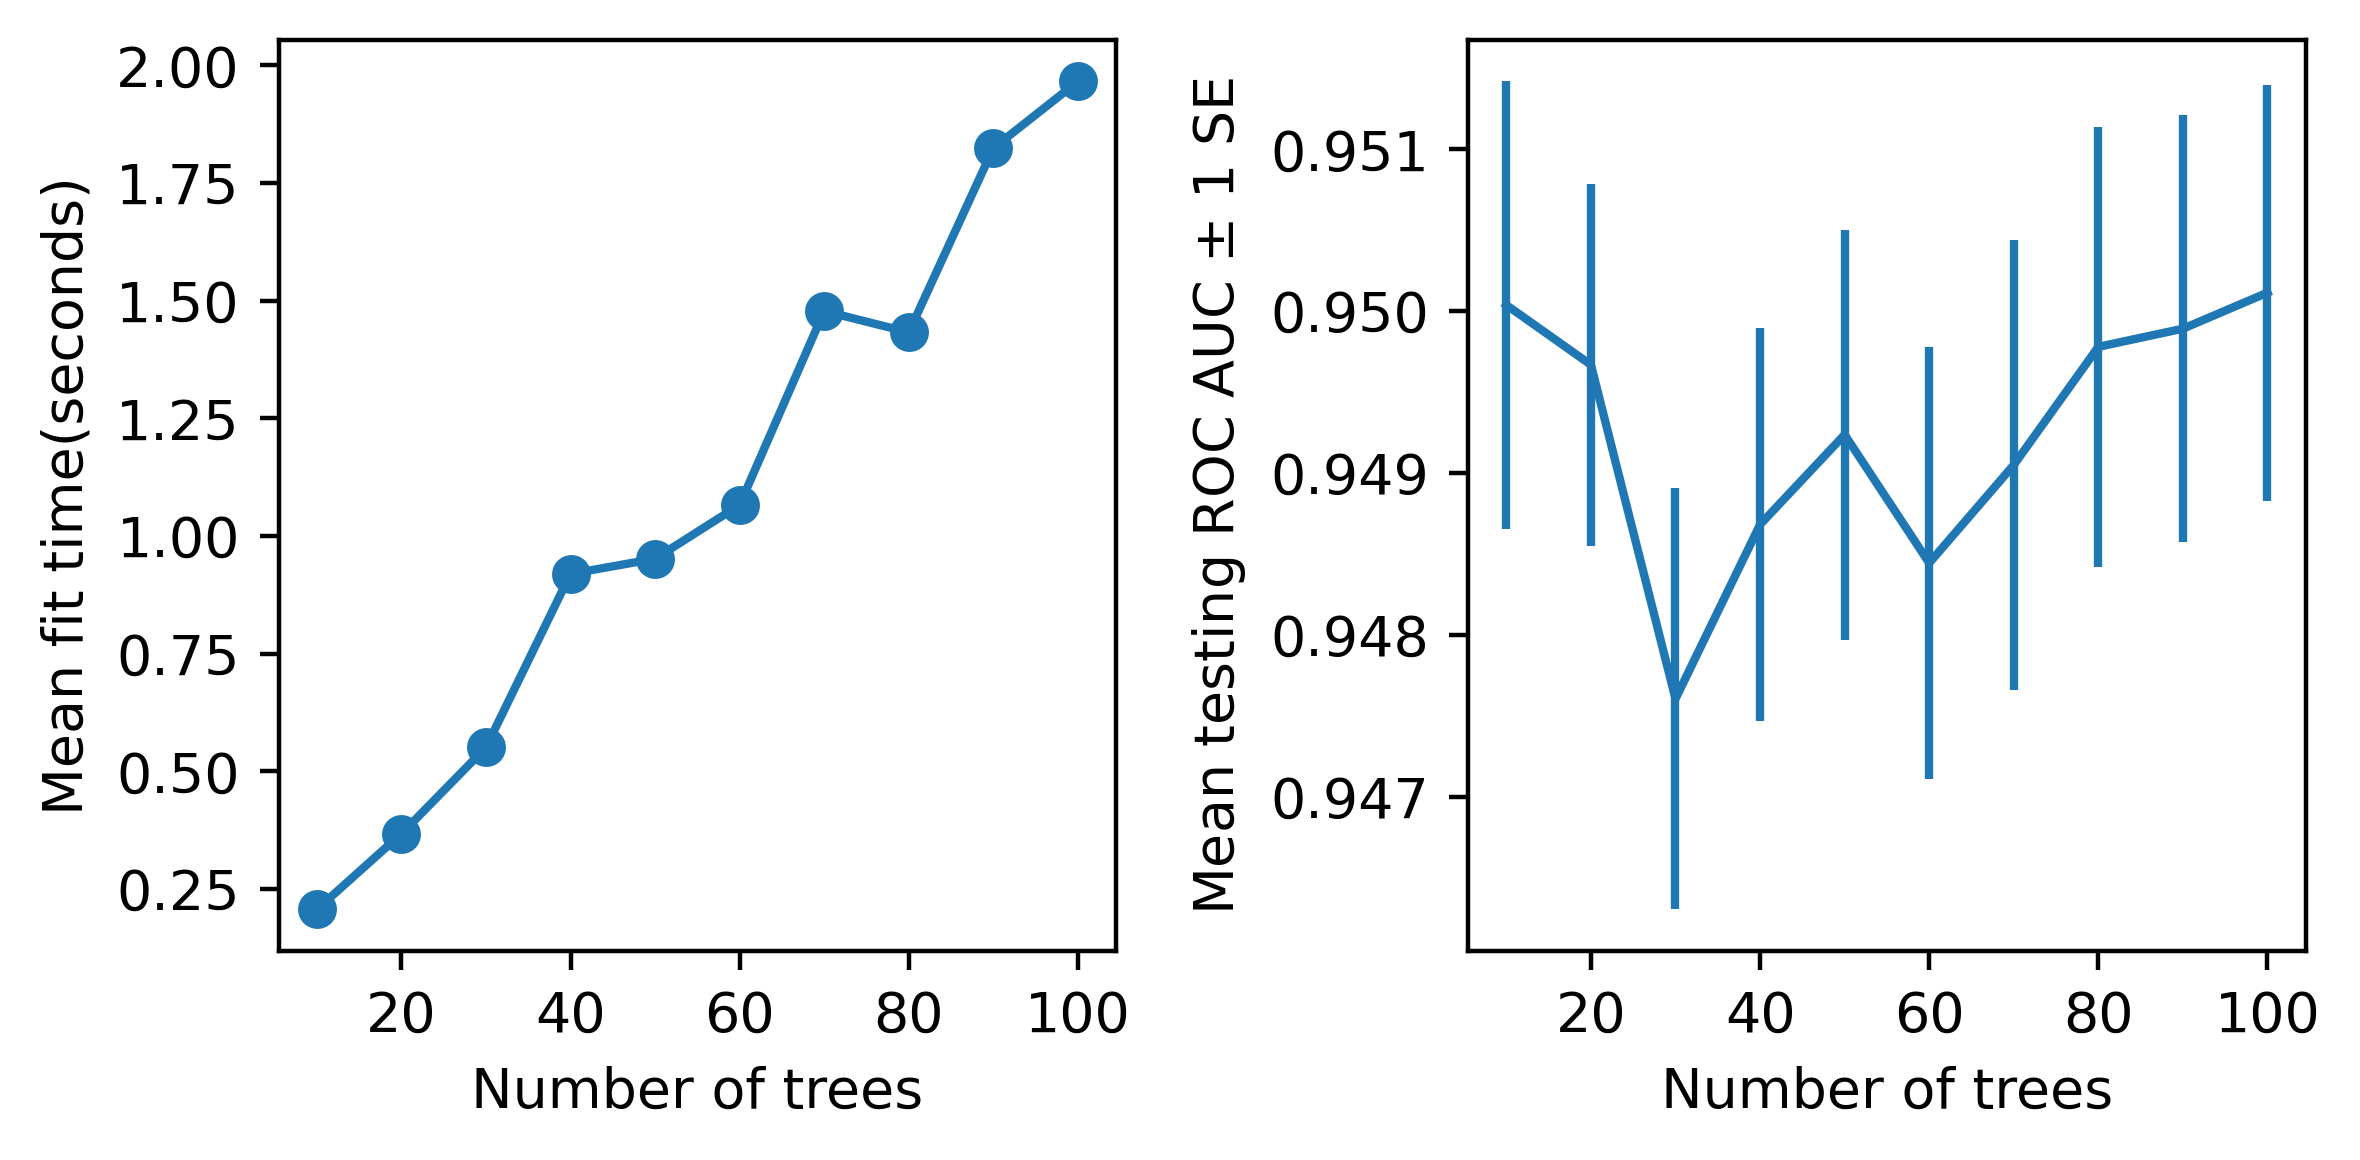

In [19]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time(seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')
plt.tight_layout()

<Axes: >

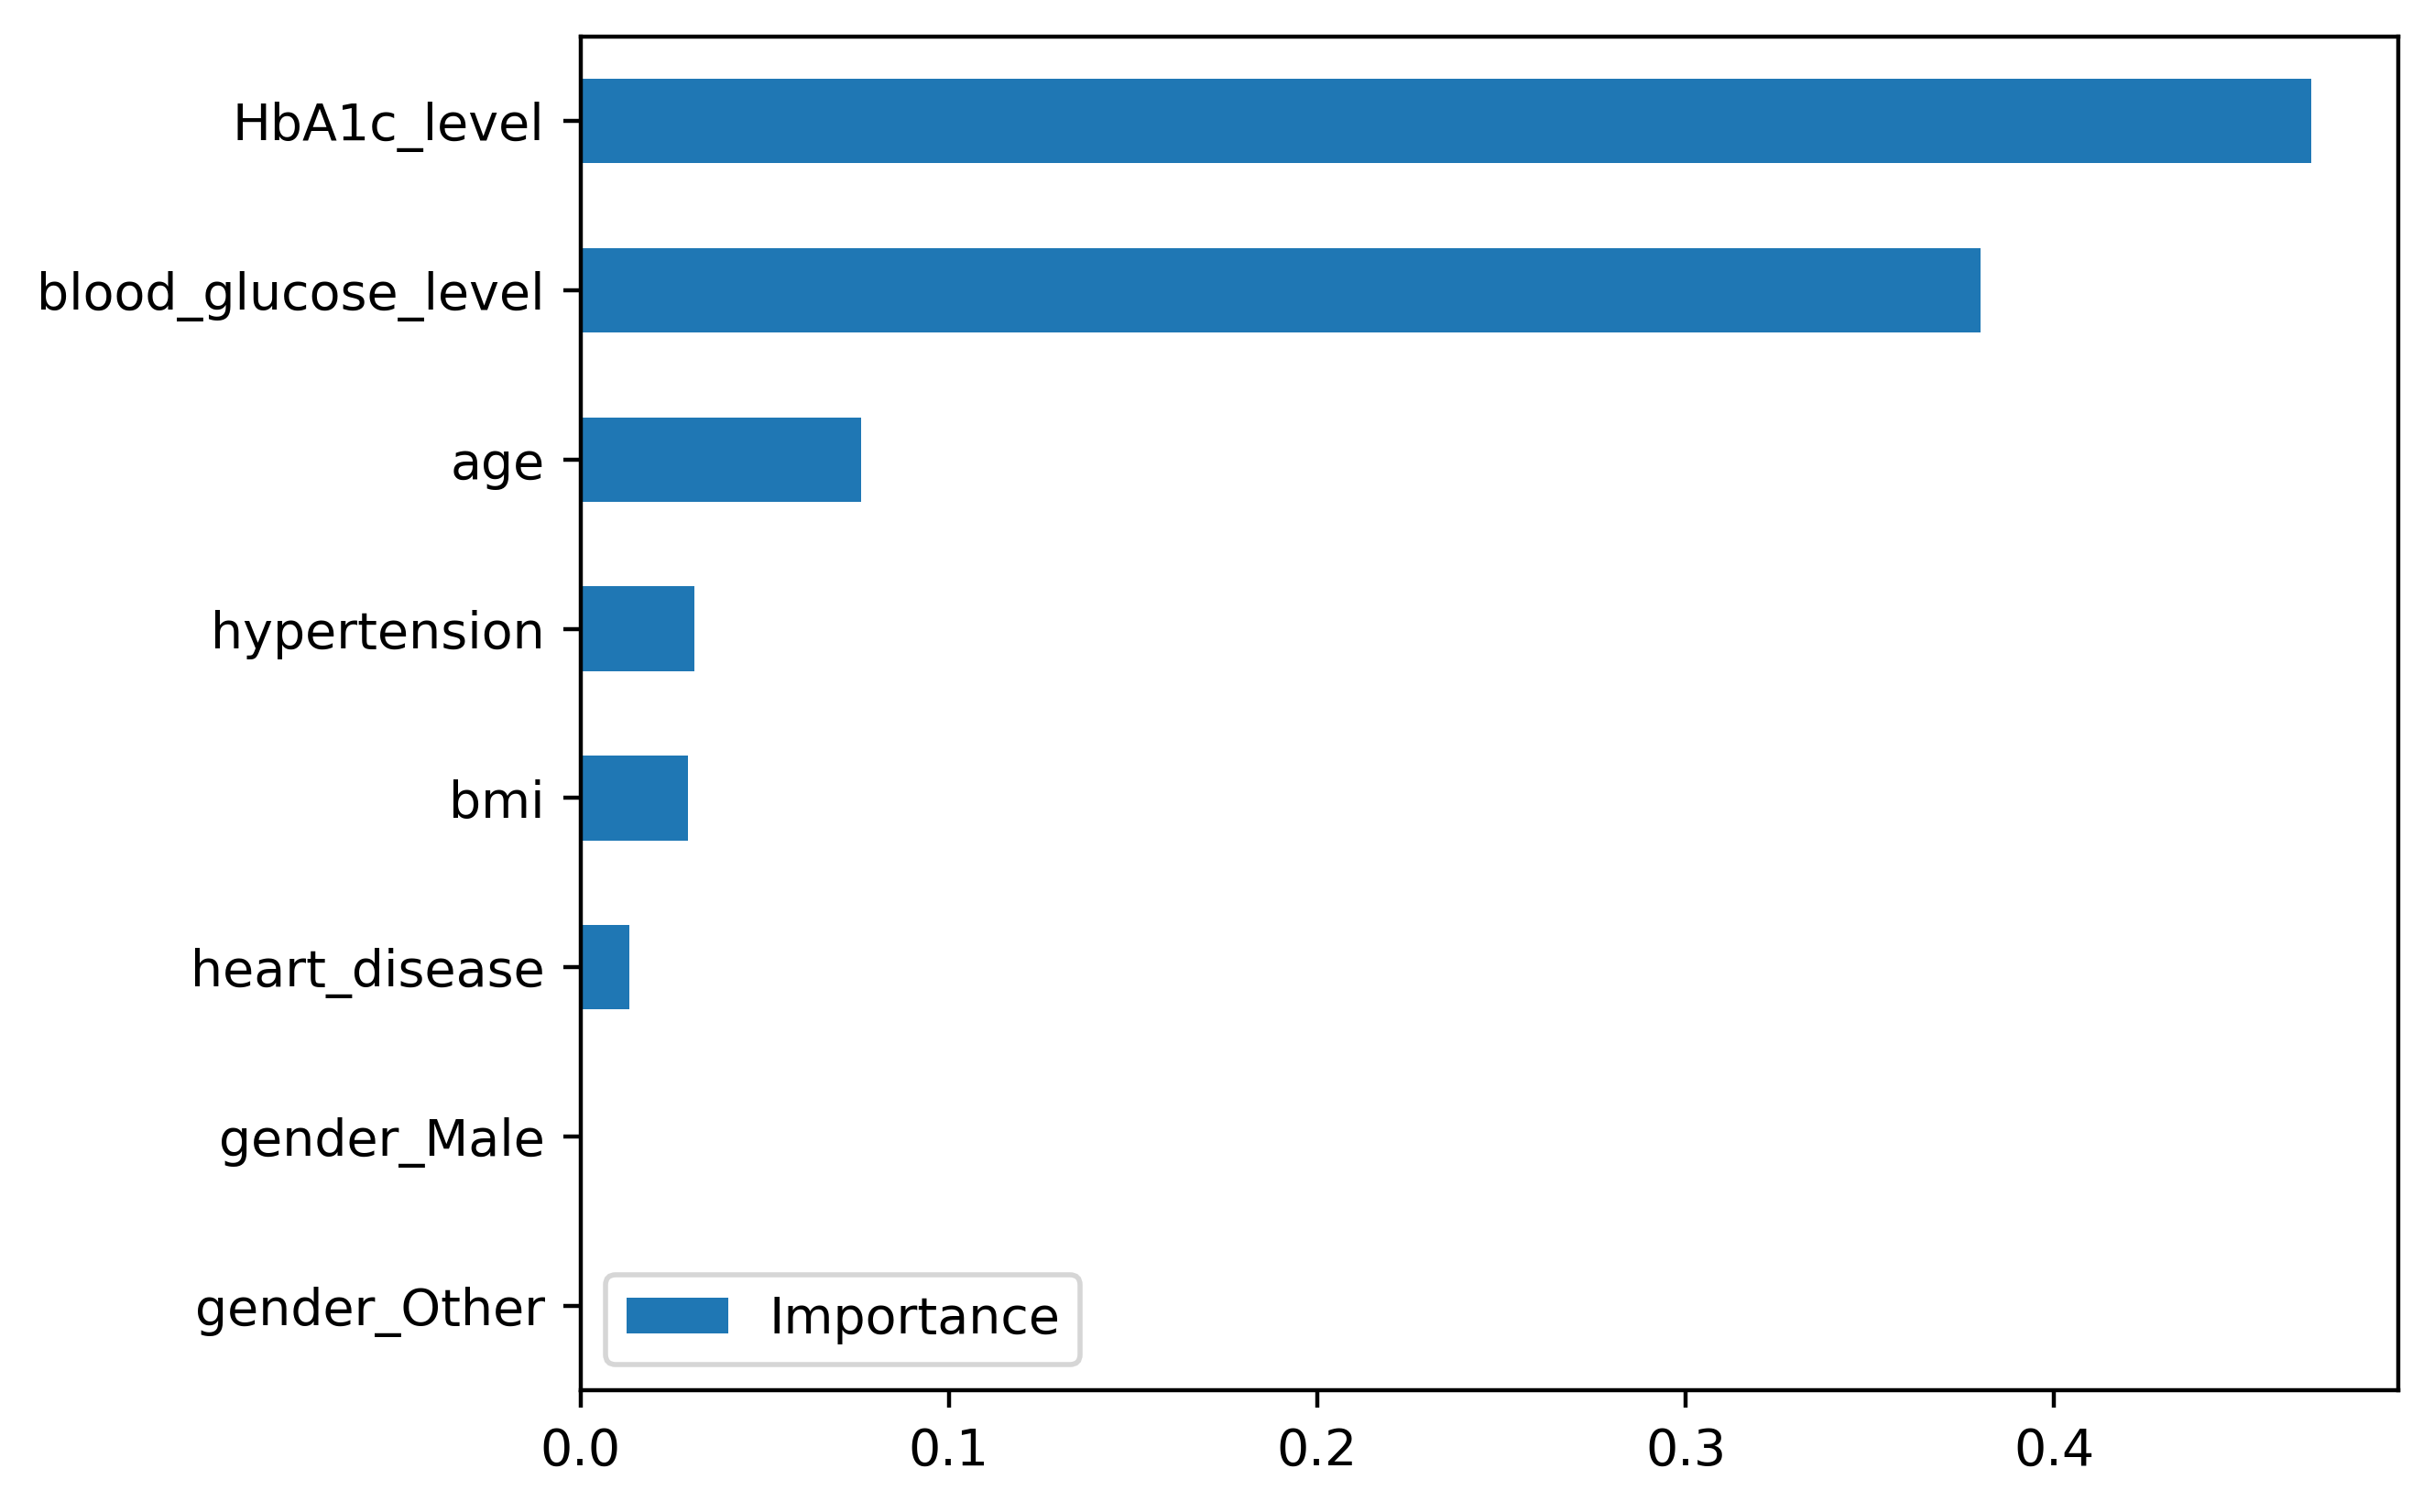

In [28]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importance
feat_imp_df = pd.DataFrame({
    'Importance':cv_rf_ex.best_estimator_.feature_importances_},
                           index=df_encoded.columns)
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()